# Running PCRGlobWB using the eWaterCycle system

This notebook assumes you have a working model configuration available on your system. We will use the example data from https://github.com/UU-Hydro/PCR-GLOBWB_input_example and we will user `ewatercycle.parametersetdb` to copy it to our local directory.

We will combine them into one `PCRGloBWBParameterSet` object, which we can then pass to the model when we first create it.

In [1]:
import ewatercycle
import ewatercycle.models
import ewatercycle.forcing
import ewatercycle.parameter_sets

/home/verhoes/miniconda39/envs/ewatercycle/lib/python3.9/site-packages/esmvalcore/experimental/_warnings.py:18: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498
/home/verhoes/miniconda39/envs/ewatercycle/lib/python3.9/site-packages/esmvalcore/experimental/config/_config_validators.py:254: ESMValToolDeprecationWarning: `write_plots` will be removed in 2.4.0.
/home/verhoes/miniconda39/envs/ewatercycle/lib/python3.9/site-packages/esmvalcore/experimental/config/_config_validators.py:255: ESMValToolDeprecationWarning: `write_netcdf` will be removed in 2.4.0.
/home/verhoes/miniconda39/envs/ewatercycle/lib/python3.9/site-packages/esmvalcore/experimental/config/_validated_config.py:80: MissingConfigParameter: `drs` is not defined (https://docs.esmvaltool.org/projects/ESMValCore/en/latest/quickstart/configure.html)


In [2]:
ewatercycle.CFG['container_engine'] = 'singularity'  # or 'singularity'
ewatercycle.CFG['singularity_dir'] = './'
ewatercycle.CFG['output_dir'] = './'
ewatercycle.CFG['ewatercycle_config'] = './ewatercycle.yaml'
ewatercycle.CFG['parameterset_dir'] = './parameter-sets'

In [3]:
ewatercycle.parameter_sets.download_example_parameter_sets()

Download complete.
Adding parameterset wflow_rhine_sbm_nc to ewatercycle.CFG... 
Download complete.
Adding parameterset pcrglobwb_example_case to ewatercycle.CFG... 
Download complete.
Adding parameterset lisflood_fraser to ewatercycle.CFG... 
3 example parameter sets were downloaded
Config written to /home/verhoes/git/eWaterCycle/ewatercycle/docs/examples/ewatercycle.yaml
Saved parameter sets to configuration file /home/verhoes/git/eWaterCycle/ewatercycle/docs/examples/ewatercycle.yaml


In [3]:
ewatercycle.CFG.reload()

In [4]:
parameter_set = ewatercycle.parameter_sets.get_parameter_set('pcrglobwb_example_case')
print(parameter_set)

Parameter set
-------------
name='pcrglobwb_example_case'
directory=PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/examples/parameter-sets/pcrglobwb_example_case')
config=PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/examples/parameter-sets/pcrglobwb_example_case/setup_natural_test.ini')
doi='N/A'
target_model='pcrglobwb'
supported_model_versions={'setters'}


In [5]:
forcing = ewatercycle.forcing.load_foreign(
    target_model = "pcrglobwb",
    start_time = "2001-01-01T00:00:00Z",
    end_time = "2010-12-31T00:00:00Z",
    directory = "./parameter-sets/pcrglobwb_example_case/forcing",
    shape = None,
    forcing_info = dict(
        precipitationNC = "precipitation_2001to2010.nc",
        temperatureNC = "temperature_2001to2010.nc"
))
print(forcing)

Forcing data for PCRGlobWB
--------------------------
Directory: ./parameter-sets/pcrglobwb_example_case/forcing
Start time: 2001-01-01T00:00:00Z
End time: 2010-12-31T00:00:00Z
Shapefile: None
Additional information for model config:
  - temperatureNC: temperature_2001to2010.nc
  - precipitationNC: precipitation_2001to2010.nc


In [7]:
pcrglob = ewatercycle.models.PCRGlobWB(version="setters", parameter_set=parameter_set, forcing=forcing)

In [8]:
pcrglob.parameters

[('start_time', '2001-01-01T00:00:00Z'),
 ('end_time', '2001-01-01T00:00:00Z'),
 ('routing_method', 'accuTravelTime'),
 ('max_spinups_in_years', '20')]

In [9]:
# We can modify all settings above during the setup. Here's how to use a different forcing file
cfg_file, cfg_dir = pcrglob.setup(end_time='2001-02-28T00:00:00Z', max_spinups_in_years=5)
cfg_file, cfg_dir

Running docker://ewatercycle/pcrg-grpc4bmi:setters singularity container on port 35435


(PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/examples/pcrglobwb_20210629_134506/pcrglobwb_ewatercycle.ini'),
 PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/examples/pcrglobwb_20210629_134506'))

In [10]:
pcrglob.parameters

[('start_time', '2001-01-01T00:00:00Z'),
 ('end_time', '2001-02-28T00:00:00Z'),
 ('routing_method', 'accuTravelTime'),
 ('max_spinups_in_years', '5')]

In [11]:
pcrglob.initialize(str(cfg_file))

In [12]:
pcrglob.output_var_names

('groundwater_recharge',
 'lake_and_reservoir_storage',
 'domesticWaterConsumptionVolume',
 'land_surface_actual_evaporation',
 'groundwater_storage',
 'snow_melt',
 'totalPotentialMaximumGrossDemand',
 'interception_evaporation',
 'total_groundwater_abstraction',
 'water_body_actual_evaporation',
 'interflow',
 'non_irrigation_gross_demand_volume',
 'livestock_water_withdrawal',
 'land_surface_potential_evaporation',
 'total_groundwater_storage',
 'bare_soil_evaporation',
 'top_water_layer_evaporation',
 'transpiration_from_irrigation',
 'total_thickness_of_active_water_storage',
 'domestic_water_withdrawal',
 'netLqWaterToSoil_at_irrigation_volume',
 'interception_storage',
 'non_irrigation_gross_demand',
 'livestockWaterConsumptionVolume',
 'surface_water_storage',
 'irrigation_gross_demand_volume',
 'upper_soil_storage',
 'desalination_source_abstraction_volume',
 'snow_free_water_evaporation',
 'surface_water_abstraction',
 'industryWaterConsumptionVolume',
 'fossil_groundwater_st

In [13]:
pcrglob.get_value("discharge")

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,
        0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0., nan,
       nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,
        0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan,
       nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan,  0.,
       nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0., na

In [14]:
pcrglob.get_value_as_xarray("discharge")

<xarray.DataArray 'discharge' (latitude: 13, longitude: 17)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        nan,  0., nan, nan],
       [nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., nan],
       [nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan,
        nan, nan, nan, nan],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan]])
Coordinates:
  * longitude  (longitude) float64 3.75 4.25 4.75 5.25 ... 10.75 11.25 11.75
  * latitude   (latitude) float64 46.25 46.75 47.25 47.75 ... 51.25 51.75 52.25
    time       object 2000-12-31 00:00:00
Attributes:
    units:    m3.s-1

In [15]:
# Run the model for a few steps and show progress every tenth step
for i in range(100):
    if i % 10 == 0:
        print(pcrglob.time)
    pcrglob.update()

36524.0
36534.0
36544.0
36554.0
36564.0
36574.0
36584.0
36594.0
36604.0
36614.0


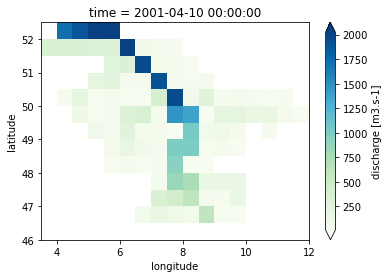

In [16]:
da = pcrglob.get_value_as_xarray("discharge")
da.plot(robust=True, cmap='GnBu')

In [17]:
pcrglob.finalize()
del pcrglob